The covid-19 pandemic ravaged the world and brought it to a standstill around March 2020 to a resonable part of the following years, eveolving to variants that were more communicable that the earlier ones. This analysis shows the effect the covid pandemic has had on a couple of countries 


The data were are analysing is over the period of DEC-31-2019 through OCT-10-2020

This analysis is done with Python 


The dataset we are using to analyze the impacts of covid-19 is downloaded from Kaggle. It contains data about:

the country code

name of all the countries

date of the record

HDI - Human development index of all the countries

Daily covid-19 cases

Daily deaths due to covid-19

STI - stringency index of the countries

the population of the countries

GDP per capita of the countries

In [ ]:
#we need this module later in our code but since its not installed yet, we have to manually install it  

!pip install pycountry_convert


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 10.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 297 kB 61.9 MB/s 
     |████████████████████████████████| 209 kB 65.4 MB/s 
     |████████████████████████████████| 297 kB 62.2 MB/s 
     |████████████████████████████████| 297 kB 63.3 MB/s 
     |████████████████████████████████| 296 kB 62.6 MB/s 
     |████████████████████████████████| 296 kB 56.4 MB/s 
     |████████████████████████████████| 280 kB 63.9 MB/s 
     |████████████████████████████████| 280 kB 53.6 MB/s 
     |████████████████████████████████| 280 kB 59.4 MB/s 
     |████████████████████████████████| 280 kB 66.3 MB/s 
     |████████████████████████████████| 279 kB 64.1 MB/s 
     |████████████████████████████████| 279 kB 62.7 MB/s 
     |██████████████

In [ ]:
# importing our dependencies 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from datetime import datetime as dt
import pycountry_convert as pc

import plotly.express as px

In [ ]:
covid_data_1 = pd.read_csv('/content/raw_data.csv')
covid_data_2= pd.read_csv('/content/transformed_data.csv')

covid_data_1 is raw data 
covid_data_2 is transformed data 

In [ ]:
covid_data_1.head()

iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
2      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
3      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
4      #NUM!       #NUM!       #NUM!    17.477233  7.497754494

In [ ]:
covid_data_2.head()

CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754

In [ ]:
covid_data_1.shape

(50418, 14)

In [ ]:
covid_data_2.shape

(50418, 9)

data cleaning and preparation

it can be seen that the tables are the same but still somewhat different.

the headings contains the same things but are named differently,the raw data table also contains more columns than the transformed table. 


But we need information from both tables before we can perform our analysis.

 so we clean and combine both tables and the analyse

In [ ]:
covid_data_1.isna().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64

In [ ]:
covid_data_2.isna().sum()


CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

In a normal case,we would find a way to replace ourmissing values with a MEAN or MODE value.

But in this case, we cant, because the data for each country is particular to that country and that country alone, so a general mean or mode wouldnt work in this case 

In this case i choose NOT to drop the null values but to REPLACE them with Zeros

that way the rows are still available for use by us 

and because the empty data is just about 10% of our whole data even, we can analyse without it 

In [ ]:
covid_data_1= covid_data_1.replace(to_replace=np.nan,value=0)

In [ ]:
covid_data_2= covid_data_2.replace(to_replace=np.nan,value=0)
#to understand how the replacefunction works, check
#https://www.geeksforgeeks.org/replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-dataframe/

In [ ]:
covid_data_2.isna().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

the empty cells have been filled with zeros and their rows are still available for use 

In [ ]:
covid_data_2.shape

(50418, 9)

In [ ]:
covid_data_1.shape

(50418, 14)

our data has the same number of row filled rows now,

we can then combine the two datasets together and get what we need from it.

but first we have to still do some cleaning with the data columns titles 

If you check the raw files,you seeit still has the unnamed columns 9-13
the information we needfrom them are contained in the the Covid_data_2
so we can afford to delete them 

In [ ]:
covid_data_1 = covid_data_1.drop('Unnamed: 9',axis=1)
covid_data_1 = covid_data_1.drop('Unnamed: 10',axis=1)
covid_data_1 = covid_data_1.drop('Unnamed: 11',axis=1)
covid_data_1 = covid_data_1.drop('Unnamed: 12',axis=1)
covid_data_1 = covid_data_1.drop('Unnamed: 13',axis=1)



In [ ]:
covid_data_1.head()

iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  
0               0.0    38928341        1803.987                    0.498  
1               0.0    38928341        1803.987                    0.498  
2               0.0    38928341        1803.987                    0.498  
3               0.0    38928341        1803.987                    0.498  
4               0.0    38928341        1803.987                    0.498

we just removed our unwanted columns 

In [ ]:
covid_data_2.head()

CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754

In [ ]:
covid_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      50418 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


In [ ]:
fig = px.choropleth(covid_data_2, locationmode='ISO-3', locations='CODE',
                   color='GDPCAP',
                   hover_name='COUNTRY',hover_data=['TC','TD','STI','POP'],
                   animation_frame='DATE', projection= 'natural earth',
                   title='GDP by date')
fig.show()

In [ ]:
population = covid_data_1.population
gdp_capital = covid_data_1.gdp_per_capita

covid_data_2['population'] = population
covid_data_2['gdp_cap'] = gdp_capital
#this here creates a new colum in our covid_data_2 table,
#so basically i just transfered data from the covid_data_1 table to covid_data_2 

In [ ]:
covid_data_2.head()

CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP  \
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754   
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754   
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754   
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754   
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754   

   population   gdp_cap  
0    38928341  1803.987  
1    38928341  1803.987  
2    38928341  1803.987  
3    38928341  1803.987  
4    38928341  1803.987

In [ ]:
fig = px.choropleth(covid_data_2, locationmode='ISO-3', locations='CODE',
                   color='gdp_cap',
                   hover_name='COUNTRY',hover_data=['TC','TD','STI','population'],
                   animation_frame='DATE', projection= 'natural earth',
                   title='GDP by date')
fig.show()

In [ ]:
covid_data_2['DATE']= covid_data_2['DATE'].map(lambda x: dt.strptime(x, '%Y-%m-%d'))
#let me explain what this does
# we want to convert the covid_data_2 from the format it is to a Y-m-d format
#since the DATE inthe table is in the string format,we first Use DT.STRPTIME to convert it to a datetime object
#the lamba then applies it to the X value which is the first DATE
#the MAP function then applies it to the whole column
#and then wesave it backinto the same table 



covid_data_2['year'] = covid_data_2['DATE'].map(lambda x:x.year)

covid_data_2['month'] = covid_data_2['DATE'].map(lambda x:x.month)

if you run this line 62 asecond time,you'd get an error. why?



In [ ]:
covid_data_2.head()

CODE      COUNTRY       DATE    HDI   TC   TD  STI        POP    GDPCAP  \
0  AFG  Afghanistan 2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754   
1  AFG  Afghanistan 2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754   
2  AFG  Afghanistan 2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754   
3  AFG  Afghanistan 2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754   
4  AFG  Afghanistan 2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754   

   population   gdp_cap  year  month  
0    38928341  1803.987  2019     12  
1    38928341  1803.987  2020      1  
2    38928341  1803.987  2020      1  
3    38928341  1803.987  2020      1  
4    38928341  1803.987  2020      1

In [ ]:
#to reaarange our dataframe table in the order we want

covid_data_2 = covid_data_2[['CODE','COUNTRY','DATE','year','month','population','gdp_cap','HDI','TC','TD','STI']]


In [ ]:
covid_data_2.head()

CODE      COUNTRY       DATE  year  month  population   gdp_cap    HDI   TC  \
0  AFG  Afghanistan 2019-12-31  2019     12    38928341  1803.987  0.498  0.0   
1  AFG  Afghanistan 2020-01-01  2020      1    38928341  1803.987  0.498  0.0   
2  AFG  Afghanistan 2020-01-02  2020      1    38928341  1803.987  0.498  0.0   
3  AFG  Afghanistan 2020-01-03  2020      1    38928341  1803.987  0.498  0.0   
4  AFG  Afghanistan 2020-01-04  2020      1    38928341  1803.987  0.498  0.0   

    TD  STI  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0

In [ ]:
#what are the things you notice

#the table has been rearranged the way we want it
#AND
#some values has been droped E.G POP from original covid_data_2,GDPCAP from original covid_data_2 has been dropped 
#because the population from covid_data_1 is more accurate thanthe one that was in covid_data_2 before 
#the gdp_cap is also more accuarate than the GDPCAP which is very inacurate 
#

In [ ]:
#to rename our columns and make everyting capital 

covid_data_2= covid_data_2.rename(columns={'CODE':'code', 'COUNTRY':'country','DATE':'date','gdp_cap':'GDP_CAP'})

In [ ]:
covid_data_2.head()

code      country       date  year  month  population   GDP_CAP    HDI   TC  \
0  AFG  Afghanistan 2019-12-31  2019     12    38928341  1803.987  0.498  0.0   
1  AFG  Afghanistan 2020-01-01  2020      1    38928341  1803.987  0.498  0.0   
2  AFG  Afghanistan 2020-01-02  2020      1    38928341  1803.987  0.498  0.0   
3  AFG  Afghanistan 2020-01-03  2020      1    38928341  1803.987  0.498  0.0   
4  AFG  Afghanistan 2020-01-04  2020      1    38928341  1803.987  0.498  0.0   

    TD  STI  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0

In [ ]:
covid_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   code        50418 non-null  object        
 1   country     50418 non-null  object        
 2   date        50418 non-null  datetime64[ns]
 3   year        50418 non-null  int64         
 4   month       50418 non-null  int64         
 5   population  50418 non-null  int64         
 6   GDP_CAP     50418 non-null  float64       
 7   HDI         50418 non-null  float64       
 8   TC          50418 non-null  float64       
 9   TD          50418 non-null  float64       
 10  STI         50418 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 4.2+ MB


In [ ]:
# fig = px.choropleth(covid_data_2, locationmode='ISO-3', locations='code',
#                    color='GDP_CAP',
#                    hover_name='country',hover_data=['TC','TD','STI','population'],
#                    animation_frame='date', projection= 'natural earth',
#                    title='GDP by date')
# fig.show() 

In [ ]:
# covid_data_2['date'] = dt.timestamp(covid_data_2['date'])

# fig = px.choropleth(covid_data_2,locationmode= 'ISO-3',locations='code',color='GDP_CAP',
#                     hover_name='country',hover_data=['population','TD','TC','STI'],
#                     animation_frame='date',projection='natural earth',
#                     title='GDP by date')

# fig.show()

**Code** - This column represents the ISO Codes given to a country. Each Country gets an ISO Code that can be of two forms - Alpha_2 and Alpha_3. We can use these codes to find the continent the country resides in.


**Country** - This column contains the names of countries whose data has been mentioned.


**Year** - We are considering cases only till October 2020, so the cases begin from December 2019.


**Month** - Contains months from December 2019 to October 2020.


**Population** - Shows the population of each country around the world. Crucial for our analysis.


**GDP_Cap** - Represents the GDP per Capita offered by a country. GDP is the Gross Domestic Product. It refers to the sum of money that a particular state can use for the welfare of its citizens. GDP per Capita is the division of the GDP among the citizens. Higher the GDP per Capita, more the country is capable of handling pandemic level situations like COVID-19.


**HDI** - Stands for Human Development Index. It is a measure of average achievement in key areas of human development. These could include healthcare facilities, medical advancements etc. Simply put, higher the HDI, better chances of citizens surviving a COVID-19 pandemic.


**TC** - Refers to Total Cases. Measured daily, this tally gives us the number of people affected by the COVID-19 pandemic.

**TD** - Refers to Total Deaths. Measured daily, this tally gives us the number of people who died as a result of contracting the SARS-COV-2 virus.


**Stringency_Index** - Refers to how strict governments around the world became during the pandemic. Also refers to how stringent people became about following lockdown rules. In simpler words, it refers to how willing people were to following the rules of a pandemic.

In [ ]:
#our first visualization

first viusalization

In [ ]:
covid_data_2[covid_data_2.country =='Kosovo']

code country       date  year  month  population   GDP_CAP  HDI  \
25104  OWID_KOS  Kosovo 2020-03-14  2020      3     1932774  9795.834  0.0   
25105  OWID_KOS  Kosovo 2020-03-15  2020      3     1932774  9795.834  0.0   
25106  OWID_KOS  Kosovo 2020-03-16  2020      3     1932774  9795.834  0.0   
25107  OWID_KOS  Kosovo 2020-03-17  2020      3     1932774  9795.834  0.0   
25108  OWID_KOS  Kosovo 2020-03-18  2020      3     1932774  9795.834  0.0   
...         ...     ...        ...   ...    ...         ...       ...  ...   
25319  OWID_KOS  Kosovo 2020-10-15  2020     10     1932774  9795.834  0.0   
25320  OWID_KOS  Kosovo 2020-10-16  2020     10     1932774  9795.834  0.0   
25321  OWID_KOS  Kosovo 2020-10-17  2020     10     1932774  9795.834  0.0   
25322  OWID_KOS  Kosovo 2020-10-18  2020     10     1932774  9795.834  0.0   
25323  OWID_KOS  Kosovo 2020-10-19  2020     10     1932774  9795.834  0.0   

             TC        TD       STI  
25104  0.693147  0.000000  4.279717  
25105  1.609438  0.000000  4.444884  
25106  2.564949  0.000000  4.444884  
25107  2.772589  0.000000  4.444884  
25108  2.944439  0.000000  4.444884  
...         ...       ...       ...  
25319  9.699043  6.459904  3.966132  
25320  9.703938  6.461468  3.966132  
25321  9.708628  6.461468  3.966132  
25322  9.714927  6.464588  3.966132  
25323  9.734536  6.481577  3.966132  

[220 rows x 11 columns]

kosovo country code isnt alpha3,will give us problems

In [ ]:
covid_data_2[covid_data_2.country =='France']


code country       date  year  month  population    GDP_CAP    HDI  \
16413  FRA  France 2019-12-31  2019     12    65273512  38605.671  0.901   
16414  FRA  France 2020-01-01  2020      1    65273512  38605.671  0.901   
16415  FRA  France 2020-01-02  2020      1    65273512  38605.671  0.901   
16416  FRA  France 2020-01-03  2020      1    65273512  38605.671  0.901   
16417  FRA  France 2020-01-04  2020      1    65273512  38605.671  0.901   
...    ...     ...        ...   ...    ...         ...        ...    ...   
16702  FRA  France 2020-10-15  2020     10    65273512  38605.671  0.901   
16703  FRA  France 2020-10-16  2020     10    65273512  38605.671  0.901   
16704  FRA  France 2020-10-17  2020     10    65273512  38605.671  0.901   
16705  FRA  France 2020-10-18  2020     10    65273512  38605.671  0.901   
16706  FRA  France 2020-10-19  2020     10    65273512  38605.671  0.901   

              TC         TD  STI  
16413   0.000000   0.000000  0.0  
16414   0.000000   0.000000  0.0  
16415   0.000000   0.000000  0.0  
16416   0.000000   0.000000  0.0  
16417   0.000000   0.000000  0.0  
...          ...        ...  ...  
16702  13.565847  10.405383  0.0  
16703  13.604399  10.408044  0.0  
16704  13.634912  10.413403  0.0  
16705  13.673021  10.416072  0.0  
16706  13.706849  10.418614  0.0  

[294 rows x 11 columns]

In [ ]:
covid_data_2.country.value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: country, Length: 210, dtype: int64

In [ ]:
covid_data_2.country.value_counts().mode()


0    294
dtype: int64

we see here that most of the countries have 294 occurences, which is why in the code below, we would be diving the sum of the population,the GDP_CAP and the HDI by 294. TC and TD will not be divided because we need the daily count for our analysis. 

In [ ]:
covid_data_2 = covid_data_2[covid_data_2.country != 'Kosovo']
#we need to drop kosovo because the country code is invalid and wikk give serious problems 
#in the next phase of code 

country =covid_data_2.country.unique().tolist()
#this gives us the unique/distict countries and the tolist() function stores it in a list
country_code = covid_data_2.code.unique().tolist()
pop_world = covid_data_2.population.unique().tolist()

world_hdi =[]
world_gdp =[]
country_cases =[]
country_deaths =[]
stringency_index =[]

for i in country:
  world_hdi.append((covid_data_2.loc[covid_data_2.country == i, 'HDI']).sum()/294)
#   #loc[covid_data_2 == i, 'HDI']finds the data at row i and column HDI
#   #check https://www.geeksforgeeks.org/python-pandas-dataframe-loc/ to refresh memeory on loc function
#   #while the rest divides our result by 294(which is the mean) and appendes it to world_hdi

  world_gdp.append(covid_data_2.loc[covid_data_2.country == i,'GDP_CAP'].sum()/294)  

  country_cases.append(covid_data_2.loc[covid_data_2.country == i,'TC'].sum())

  country_deaths.append(covid_data_2.loc[covid_data_2.country ==i,'TD'].sum())

  stringency_index.append(covid_data_2.loc[covid_data_2.country == i,'STI'].sum()/294)

  #this does the same to all of them, getting the mean and the sums 
  #onlythe data fro the world is dividedsowe can get the world average 

In [ ]:
print(country)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',

from here it gets pretty damn interesting. we would be using a function called PYCOUNTRY CONVERT to get the continents fromthe country code. 

PYCOUNTRY CONVERT is mostly used to convert alpha3 country code to alpha2 country code,
alpha2country code to continents etc


the module has to be called first and then used.

this link further explains how the PYCountry covert functions.

https://pypi.org/project/pycountry-convert/

bear in mind that the country code in our data is the alpha3 country code


for our analysis, we need to get the continent of each country and group by continent.Thats the reason were doing this

In [ ]:
#from the website,you see that you can only get the continent from alpha2 codes 
#but we have alpha3 codes, so we have to convert to alpha2 code first
#then try and get the continents 

In [ ]:
alpha2_code =[]

for i in country_code:
  alpha2_code.append(pc.country_alpha3_to_country_alpha2(i))

continent_code =[]

#we have some invalid alpha2 codes in our data, so we have to introduce
# a Try and Except condition
#we use the try and except clause when we might have syntax errors or exceptions
#check https://www.geeksforgeeks.org/python-try-except/ for more understanding 
for i in alpha2_code:
  try:
      continent_code.append(pc.country_alpha2_to_continent_code(i))
  except:
    continent_code.append('Unknown')


#pd.Dataframe(list(zip)is used to create dataframes from a group of lists
#it turns them into a list of tuples first and the into a dataframe
#see https://www.geeksforgeeks.org/create-pandas-dataframe-from-lists-using-zip/ for more understanding 

data_agg =pd.DataFrame(list(zip(country_code,country,pop_world,country_cases,country_deaths,world_hdi,world_gdp,stringency_index,continent_code)),
                       columns = ['Code','Country','Population','Cases','Deaths','HDI','GDP_CAP','STI','Continent'])

#since our continent code is also alpha2,we have to replace it with words
data_agg = data_agg.replace({'AF':'Africa','AN':'Antarctica','AS':'Asia','EU':'Europe','NA':'North America',
                             'OC':'Ocieania','SA':'South America'})

data_agg = data_agg.round(2)


to see how pd.dataframe(list(zip) works

see https://www.geeksforgeeks.org/create-pandas-dataframe-from-lists-using-zip/

In [ ]:
data_agg.head()

Code      Country  Population    Cases   Deaths   HDI   GDP_CAP   STI  \
0  AFG  Afghanistan    38928341  2000.65  1226.95  0.50   1803.99  3.05   
1  ALB      Albania     2877800  1702.24   929.37  0.60   9033.24  3.01   
2  DZA      Algeria    43851043  2052.51  1406.22  0.75  13913.84  3.20   
3  AND      Andorra       77265  1465.83   786.66  0.66      0.00  2.68   
4  AGO       Angola    32866268  1203.98   590.14  0.42   4196.37  2.97   

  Continent  
0      Asia  
1    Europe  
2    Africa  
3    Europe  
4    Africa

Main visualizations


Tounderstanda bit more how the px module works 

https://medium.com/plotly/introducing-plotly-express-808df010143d

GDP_CAP vs HDI

In [ ]:
fig = px.scatter(data_agg,x='HDI',y='GDP_CAP',size='Population',hover_name='Country',
                 color='Continent',template='simple_white',size_max=50)

fig.update_layout(height=500,title_text='GDP_CAP VS HDI')

fig.show()

you see that there an upward trend,direct proportionality.Countries that have higher HDI have higher GDP's even duringthe covid period 

GDP VS COVID-19 CASES

In [ ]:
fig = px.scatter(data_agg,x='Cases',y='GDP_CAP',size='Population',color='Continent',
                 hover_name='Country',template='simple_white',size_max=50)
fig.update_layout(height=500,title_text='GDP VS COVID-19')

fig.show()

In this case,there is no clear pattern that the GDP affects the number of covid cases per country. plot shows to some extent the randomness of GDP vs COVID(considering the population ofthese countries) 

HDI VS COVID-19

In [ ]:
fig = px.scatter(data_agg,x='HDI',y='Cases',size='Population',color='Continent',
                 hover_name='Country',template='simple_white',size_max=50)
fig.update_layout(height=500,title_text='COVID-19 Cases VS HDI')

fig.show()

to some extent, it looks like an upward trend to me,buts still has scattered data,

ill use a lineplot to see if im right 

Text(0.5, 1.0, 'Covid-19 vs HDI')

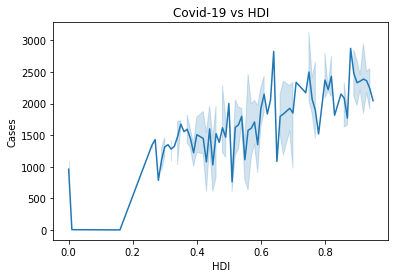

In [ ]:
sns.lineplot(data=data_agg[['HDI','Cases']],x='HDI',y='Cases')
plt.title('Covid-19 vs HDI')

seems like anupward trend from 0.2 upward in a funny way.

no definate upward trend by covid cases definately increases with an increase in HDI

In [ ]:
fig = px.scatter(data_agg,x='STI',y='Cases',size='Population',color='Continent',
                 hover_name='Country',template='simple_white',size_max=50)
fig.update_layout(height=500,title_text='COVID-19 Cases VS HDI')

fig.show()

In [ ]:
fig = px.scatter(data_agg,x='GDP_CAP',y='Cases',hover_name='Country',animation_frame='Continent',
                 animation_group='Country',size='Population',template='simple_white',
                 size_max=50)

# fig.update_traces(textposition='top center')
fig.update_layout(height=500,title_text='Cases VS GDP_CAP(continent)')
# fig['layout'].pop('updatemenus')
fig.show()

this helps us to see cluster of countries in continents and their GDP_CAP as at the time of this report  

with this we are done with aggregate data,now we want to see how these things progressed on amonthly basis

In [ ]:
covid_data_2.head(2)

code      country       date  year  month  population   GDP_CAP    HDI   TC  \
0  AFG  Afghanistan 2019-12-31  2019     12    38928341  1803.987  0.498  0.0   
1  AFG  Afghanistan 2020-01-01  2020      1    38928341  1803.987  0.498  0.0   

    TD  STI  
0  0.0  0.0  
1  0.0  0.0

In [ ]:
case_month= covid_data_2[['code','country','month','population','GDP_CAP','TC','HDI']].groupby(
    ['country','code','month','population','GDP_CAP','HDI'], as_index=False).sum()

    #why did they use the as_index=False??????????????????

alpha2_code_month=[]
for i in case_month['code']:
  alpha2_code_month.append(pc.country_alpha3_to_country_alpha2(i))

continent_code_month = []
for i in alpha2_code_month:
  try:
    continent_code_month.append(pc.country_alpha2_to_continent_code(i))
  except:
    continent_code_month.append('Unknown')


case_month['continent'] = continent_code_month   #new column


case_month = case_month.replace({'AF':'Africa','AN':'Antarctica','AS':'Asia','EU':'Europe','NA':'North America',
                             'OC':'Ocieania','SA':'South America'})

case_month['month'] = case_month['month'].replace({1:'Jan 2020',2:'Feb 2020',3:'Mar 2020',4:'Apr 2020',5:'May 2020',6:'Jun 2020',7:'jul 2020',8:'Aug 2020',9:'sept 2020',10:'oct 2020',12:'Dec 2019'})




In [ ]:
case_month.head()

country code     month  population   GDP_CAP    HDI          TC  \
0  Afghanistan  AFG  Jan 2020    38928341  1803.987  0.498    0.000000   
1  Afghanistan  AFG  Feb 2020    38928341  1803.987  0.498    0.000000   
2  Afghanistan  AFG  Mar 2020    38928341  1803.987  0.498   65.528279   
3  Afghanistan  AFG  Apr 2020    38928341  1803.987  0.498  194.907650   
4  Afghanistan  AFG  May 2020    38928341  1803.987  0.498  269.075539   

  continent  
0      Asia  
1      Asia  
2      Asia  
3      Asia  
4      Asia

fig = px.scatter(case_month,x='GDP_CAP',y='TC',hover_name='country',color='continent',size='population',
                 template='simple_white',size_max=50)

fig.update_traces(textposition= 'top center')
fig.update_layout(height=500,title_text='Covid-19 cases VS GDP_CAP')

fig.update_yaxes(
    range=(-100,600),
    constrain='domain'
)

fig.show()

In [ ]:
fig = px.scatter(case_month,x='GDP_CAP',y='TC',hover_name='country',animation_frame='month',
                 animation_group='country',color='continent',size='population',
                 template ='simple_white',size_max=50)

# fig.update_traces(textposition= 'top center')
fig.update_layout(height=500,title_text='Covid-19 cases VS GDP_CAP')

fig.update_yaxes(
    range=(-100,600),
    constrain='domain'
)

fig.show()

In [ ]:
fig = px.scatter(case_month,x='HDI',y='TC',hover_name='country',animation_frame='month',
                 animation_group='country',color='continent',size='population',
                 template ='simple_white',size_max=50)

# fig.update_traces(textposition= 'top center')
fig.update_layout(height=500,title_text='Covid-19 cases VS HDI')

fig.update_yaxes(
    range=(-100,600),
    constrain='domain'
)

fig.show()


HDI didnt reduce or increase for most countries

choropleth map

In [ ]:
data_agg.head(2)

Code      Country  Population    Cases   Deaths  HDI  GDP_CAP   STI  \
0  AFG  Afghanistan    38928341  2000.65  1226.95  0.5  1803.99  3.05   
1  ALB      Albania     2877800  1702.24   929.37  0.6  9033.24  3.01   

  Continent  
0      Asia  
1    Europe

In [ ]:
fig =px.choropleth(data_agg,locations='Country',locationmode='country names',color='GDP_CAP',
                   hover_name='Country',hover_data=['Population','HDI','Continent'],
                   title='Avg GDP_CAP across the world',template='simple_white',
                   color_continuous_scale='Bluered_r')

fig.show()

this shows the gdp over the 293 day period of this data 

In [ ]:
fig =px.choropleth(data_agg,locations='Country',locationmode='country names',color='HDI',
                   hover_name='Country',hover_data=['Population','Cases','Continent'],
                   title='Avg HDI across the world at the time of this report',template='simple_white',
                   color_continuous_scale='Inferno')

fig.show()

In [ ]:
fig =px.choropleth(data_agg,locations='Country',locationmode='country names',color='HDI',
                   hover_name='Country',hover_data=['Population','Cases','Continent','STI'],
                   title='Avg HDI across the world at the time of this report',template='simple_white',
                   color_continuous_scale='Inferno')

fig.show()

In [ ]:
#to check the monthly  growth of the cases 

In [ ]:
fig =px.choropleth(case_month,locations='country',locationmode='country names',color='TC',
                   hover_name='country',hover_data=['population','continent','HDI'],
                   animation_frame='month',
                   title='Monthly increase in covid-19 worldwide',template='simple_white',
                   color_continuous_scale='ice')

fig.show()

In [ ]:
#STI show by how much the countries abided by the precautions against covid-19

#solets checkthe correlation btw STIand the cases 

In [ ]:
fig=px.scatter(data_agg,x='STI',y='Cases',hover_name='Country',color='Continent',size='Population',
               template='simple_white',size_max=50)

fig.update_traces(textposition='top center')
fig.update_layout(height=500,title_text='Covid case VS STI')

fig.show()

Text(0.5, 1.0, 'Covid-19 cases vs STI')

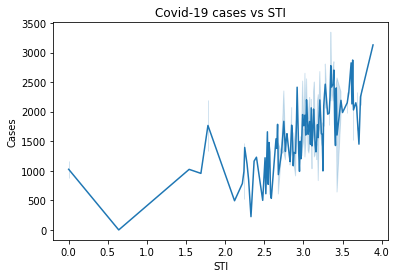

In [ ]:
sns.lineplot(data=data_agg[['STI','Cases']],x='STI',y='Cases')
plt.title('Covid-19 cases vs STI')

I say a bit of direct proportionality in most cases 

In [ ]:
#now lets see the countries where youre least likley to catch covid 

In [ ]:
data_agg.head(1)

Code      Country  Population    Cases   Deaths  HDI  GDP_CAP   STI  \
0  AFG  Afghanistan    38928341  2000.65  1226.95  0.5  1803.99  3.05   

  Continent  
0      Asia

In [ ]:
case_month.head(1)

country code     month  population   GDP_CAP    HDI   TC continent
0  Afghanistan  AFG  Jan 2020    38928341  1803.987  0.498  0.0      Asia

In [ ]:
ranking = data_agg

ranking['Death_Rate'] = (ranking['Deaths']/ ranking['Cases'])
ranking['Infection_rate'] = (ranking['Cases']/ ranking['Population']) * 100
ranking['GDP'] =(ranking['GDP_CAP'] / ranking['GDP_CAP'].sum()) *100

ranking = ranking[['Country','HDI','GDP','Population','STI','Death_Rate','Infection_rate',
                    'Continent']]

ranking = ranking.fillna(0)
ranking = ranking.round(2)

ranking['Score'] =(ranking['HDI'] + ranking['GDP']+ ranking['STI']) - (ranking['Death_Rate'])

ranking = ranking.sort_values('Score',ascending=False)

ranking.head()

Country   HDI   GDP  Population   STI  Death_Rate  Infection_rate  \
154       Qatar  0.86  3.70     2881060  3.56        0.36            0.08   
168   Singapore  0.93  2.71     5850343  3.73        0.26            0.04   
114  Luxembourg  0.90  2.99      625976  2.91        0.52            0.29   
104      Kuwait  0.80  2.07     4270563  3.68        0.47            0.05   
94      Ireland  0.94  2.13     4937796  3.38        0.68            0.04   

    Continent  Score  
154      Asia   7.76  
168      Asia   7.11  
114    Europe   6.28  
104      Asia   6.08  
94     Europe   5.77

In [ ]:
fig =px.bar(ranking[0:20],x='Score',y='Country',hover_name='Country',template='simple_white',
            color_continuous_scale='ice')

fig.update_layout(height=1000,
                  title_text = 'Top 20 safest places from covid: From least safe to most safe')

fig.show()

CONCLUSION

we can clearly see the relationship between our various columns.

we see that the United State had the highest number of covid cases and covid deaths because it has a relatively low STI value with respect to the population. 

we also saw how the GDP per capital was affected over the time period we have.

we also saw how the covid cases affected the HDI of each country

and finally the safest countries to be during the heart of the pandemic(Qatar)